In [3]:
import numpy as np
import skimage

In [35]:
image = (255 * (skimage.io.imread('primer1.jpg', as_gray=True))).astype(np.uint8)
region_array = np.zeros((image.shape))
region_counter = 1
print(image[1,1])
height, width = image.shape

for value in range (0, 256):
    coordinates = np.argwhere(image == value)
    if len(coordinates) != 0:

        for (x, y) in coordinates:
            n_counter = 0
            region_neighbor_value = []
            if (x > 0 and x < height - 1) and (y > 0 and y < width - 1):
                for delta_x, delta_y in [(-1,0), (0, -1), (1, 0), (0, 1)]:

                    d_x = x + delta_x
                    d_y = y + delta_y

                    if region_array[d_x][d_y] != 0:
                        region_neighbor_value.append(region_array[d_x, d_y])

                if n_counter == 0:
                    region_array[x][y] = region_counter
                    region_counter = region_counter + 1
                else:
                    region_array[x][y] = region_neighbor_value[0]

print(region_array[1,1])




                



178
7319643.0


In [73]:
image_array = np.array([
    [0, 69, 67, 0],
    [69, 0, 58, 0],
    [0, 123, 222, 45],
    [123, 0, 111, 0]
])
height, width = image_array.shape
regions = np.zeros_like(image_array)
    
    # Region counter
current_region = 1

    # Iterate over intensity levels (0 to 255)
for intensity in range(256):
        # Find all pixels with the current intensity
    pixel_coords = np.argwhere(image_array == intensity)
        
    for (x, y) in pixel_coords:
        neighbors = []
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 < nx < height and 0 < ny < width:
                if regions[nx, ny] != 0:  # Check if neighbor has a region
                    neighbors.append(regions[nx, ny])
            
        if not neighbors:
                # Case 1: No neighbors with regions, create a new region
            regions[x, y] = current_region
            current_region += 1
        else:
                # Case 2 & 3: Assign the pixel to one of the neighboring regions
            regions[x, y] = neighbors[0]

print(regions)

[[1 3 3 2]
 [3 3 3 4]
 [5 3 3 4]
 [6 6 6 7]]


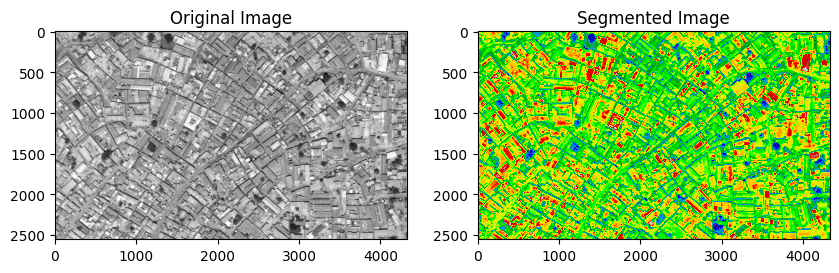

In [39]:
import matplotlib.pyplot as plt
segmented_image = image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image, cmap='nipy_spectral')
plt.show()

In [89]:
image_array = np.array([
    [0, 69, 67, 0],
    [69, 0, 58, 0],
    [0, 123, 222, 45],
    [123, 0, 111, 0]
])
regions = np.zeros_like(image_array)
region_counter = 1

neighbor_offsets = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])

def check_neighbor_values(neighbor_points):

    non_null_regions = []
    for n in neighbor_points:
        if regions[n[0], n[1]] != 0:
            non_null_regions.append(regions[n[0], n[1]])
    return non_null_regions

print(check_neighbor_values(neighbor_coordinates))


[]


In [100]:
image_array = np.array([
    [0, 69, 67, 0],
    [69, 0, 58, 0],
    [0, 123, 222, 45],
    [123, 0, 111, 0]
])
neighbor_offsets = np.array([[-1, 0], [1, 0], [0, -1], [0, 1]])
regions = np.zeros_like(image_array)
region_counter = 1
for v in range(0, 256):
    point_coordinates = np.argwhere(image_array == v)
    #print("Points with 69 value: ", point_coordinates)
    for (x, y) in point_coordinates:
        neighbor_coordinates = neighbor_offsets + (x, y)
        neighbor_coordinates = neighbor_coordinates[
            (neighbor_coordinates[:, 0] >= 0) & (neighbor_coordinates[:, 0] < image_array.shape[0]) &
            (neighbor_coordinates[:, 1] >= 0) & (neighbor_coordinates[:, 1] < image_array.shape[1])
        ]
        #print(neighbor_coordinates)
        region_values = check_neighbor_values(neighbor_coordinates)

        if len(region_values) != 0:
            regions[(x, y)] = region_values[0]
            region_values = []
        elif len(region_values) == 0:
            regions[(x, y)] = region_counter
            region_counter = region_counter + 1
        
        #print("Value: ", v)
        #print(neighbor_coordinates)
        #print("----------------")

print(regions)


[[1 3 3 2]
 [1 3 3 2]
 [4 3 3 2]
 [4 5 5 6]]
